# 라이브러리 

## 텐서플로우

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout,GRU,Flatten,Conv1D,Conv2D,MaxPooling1D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## 사이킷런

In [2]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 시계열

In [3]:
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import datetime
from datetime import datetime

## 시각화

In [4]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
import matplotlib as mpl

## 일반

In [5]:
import tensorflow as tf
from numpy import array
import pandas as pd
import numpy as np
import math
import urllib.request
import json
import os
import warnings
warnings.filterwarnings('ignore')

# 2016.1.1 ~ 2020.9.28 농산물 Train 데이터 

In [6]:
# train data set 불러오기

train_df = pd.read_csv('nongsan_data/public_data/train.csv', encoding='utf-8')
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.index = train_df['date']
train_df = train_df.drop('date',axis=1)
train_df.index.freq = 'D'
train_df = train_df.interpolate(method='linear').fillna(0)
train_df = train_df.reset_index()
train_df = pd.concat([train_df,pd.get_dummies(train_df['요일'])],axis=1)
train_df = train_df.drop('요일',axis=1)
train_df.head()

,date,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),...,캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),금요일,목요일,수요일,월요일,일요일,토요일,화요일
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
1,2016-01-02,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,...,2014.0,0.0,0.0,0,0,0,0,0,1,0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,1,0,0
3,2016-01-04,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,...,3885.0,0.0,0.0,0,0,0,1,0,0,0
4,2016-01-05,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,...,2853.0,0.0,0.0,0,0,0,0,0,0,1


# 2020.9.29 ~ 2020.11.04 농산물 Test 데이터 

In [7]:
# testdata set 불러오기

test_df = pd.read_csv('nongsan_data/public_data/test_files/test_2020-11-05.csv', encoding='utf-8')
test_df['date'] = pd.to_datetime(test_df['date'])
test_df.index = test_df['date']
test_df = test_df.drop('date',axis=1)
test_df.index.freq = 'D'
test_df = test_df.reset_index()
test_df = pd.concat([test_df,pd.get_dummies(test_df['요일'])],axis=1)
test_df = test_df.drop('요일',axis=1)
test_df.head()

,date,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),...,캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),금요일,목요일,수요일,월요일,일요일,토요일,화요일
0,2020-09-29,2064183.3,1787.0,2424383.2,1190.0,1209647.0,966.0,2842.8,25873.0,160209.8,...,3937.0,259765.0,11400.0,0,0,0,0,0,0,1
1,2020-09-30,259065.3,1551.0,1044460.0,984.0,136696.4,857.0,35.0,9929.0,48296.7,...,3885.0,121859.6,11649.0,0,0,1,0,0,0,0
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
4,2020-10-03,0.0,0.0,3100.0,835.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0


# 사용할 변수 지정

In [8]:
week_names = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

## 농산물별 자동으로 변수 만들어주는 함수

In [9]:
def set_feature_per_item(item):
    price_feature = f'{item}_가격(원/kg)'
    quantity_feature = f'{item}_거래량(kg)'
    all_features = [price_feature,quantity_feature]
    all_features.extend(week_names)
    
    return price_feature,quantity_feature,set(all_features)

In [10]:
price_feature , quantity_feature , all_features = set_feature_per_item('배추')
price_feature , quantity_feature , all_features

('배추_가격(원/kg)',
 '배추_거래량(kg)',
 {'금요일',
  '목요일',
  '배추_가격(원/kg)',
  '배추_거래량(kg)',
  '수요일',
  '월요일',
  '일요일',
  '토요일',
  '화요일'})

## 모든 필요한 변수에 날짜 넣고, 필요없는 거래량 빼줌

In [11]:
all_features.add('date')
#all_features = all_features - set(['배추_거래량(kg)'])

## 훈련용 데이터 7일 후의 배추가격을 target으로 지정

In [12]:
train_df = train_df[all_features]
train_df['7일 후'] = train_df[price_feature].shift(-7)
train_df['residual'] = 0
stl = STL(train_df[['date', price_feature]].set_index('date'), period=12)
res = stl.fit()
train_df['residual'] = res.resid.values
train_df.tail()

,배추_가격(원/kg),월요일,목요일,금요일,수요일,배추_거래량(kg),토요일,date,화요일,일요일,7일 후,residual
1728,1839.0,0,1,0,0,1856965.0,0,2020-09-24,0,0,NaN,-152.919637
1729,1789.0,0,0,1,0,1880095.5,0,2020-09-25,0,0,NaN,563.415158
1730,1760.0,0,0,0,0,1661090.9,1,2020-09-26,0,0,NaN,-359.340205
1731,3066.0,0,0,0,0,25396.0,0,2020-09-27,0,1,NaN,204.297484
1732,1867.0,1,0,0,0,2405051.9,0,2020-09-28,0,0,NaN,-232.379198


In [13]:
train_df['배추_거래량(kg)'] = train_df['배추_거래량(kg)'] - train_df['배추_거래량(kg)'].shift(1)
train_df.tail()

,배추_가격(원/kg),월요일,목요일,금요일,수요일,배추_거래량(kg),토요일,date,화요일,일요일,7일 후,residual
1728,1839.0,0,1,0,0,-150506.3,0,2020-09-24,0,0,NaN,-152.919637
1729,1789.0,0,0,1,0,23130.5,0,2020-09-25,0,0,NaN,563.415158
1730,1760.0,0,0,0,0,-219004.6,1,2020-09-26,0,0,NaN,-359.340205
1731,3066.0,0,0,0,0,-1635694.9,0,2020-09-27,0,1,NaN,204.297484
1732,1867.0,1,0,0,0,2379655.9,0,2020-09-28,0,0,NaN,-232.379198


In [14]:
train_df = train_df.iloc[1:]

In [15]:
train_df['배추_거래량(kg)'] = train_df['배추_거래량(kg)'].map(lambda x: np.abs(x))

In [16]:
train_df.tail()

,배추_가격(원/kg),월요일,목요일,금요일,수요일,배추_거래량(kg),토요일,date,화요일,일요일,7일 후,residual
1728,1839.0,0,1,0,0,150506.3,0,2020-09-24,0,0,NaN,-152.919637
1729,1789.0,0,0,1,0,23130.5,0,2020-09-25,0,0,NaN,563.415158
1730,1760.0,0,0,0,0,219004.6,1,2020-09-26,0,0,NaN,-359.340205
1731,3066.0,0,0,0,0,1635694.9,0,2020-09-27,0,1,NaN,204.297484
1732,1867.0,1,0,0,0,2379655.9,0,2020-09-28,0,0,NaN,-232.379198


## 테스트용 데이터 

In [17]:
cabbage_test_df = test_df[all_features]
cabbage_test_df['예측'] = 0 
cabbage_test_df.head()

,배추_가격(원/kg),월요일,목요일,금요일,수요일,배추_거래량(kg),토요일,date,화요일,일요일,예측
0,1787.0,0,0,0,0,2064183.3,0,2020-09-29,1,0,0
1,1551.0,0,0,0,1,259065.3,0,2020-09-30,0,0,0
2,0.0,0,1,0,0,0.0,0,2020-10-01,0,0,0
3,0.0,0,0,1,0,0.0,0,2020-10-02,0,0,0
4,0.0,0,0,0,0,0.0,1,2020-10-03,0,0,0


# 모델 생성용 피쳐

In [18]:
model_features = all_features - set(['date'])
model_features.add('residual')
model_features

{'residual',
 '금요일',
 '목요일',
 '배추_가격(원/kg)',
 '배추_거래량(kg)',
 '수요일',
 '월요일',
 '일요일',
 '토요일',
 '화요일'}

In [19]:
my_minmax = MinMaxScaler()

In [20]:
train_df[list(model_features)] = my_minmax.fit_transform(train_df[list(model_features)])

# 학습데이터 NaN 부분제거

In [21]:
cabbage_train_df = train_df.iloc[:-7]

cabbage_train_df
cabbage_train_df.tail(10)

,배추_가격(원/kg),월요일,목요일,금요일,수요일,배추_거래량(kg),토요일,date,화요일,일요일,7일 후,residual
1716,0.3496,0.0,0.0,0.0,0.0,0.036218,1.0,2020-09-12,0.0,0.0,1812.0,0.317480
1717,0.0000,0.0,0.0,0.0,0.0,0.185810,0.0,2020-09-13,0.0,1.0,2925.0,0.012409
1718,0.4084,1.0,0.0,0.0,0.0,0.234451,0.0,2020-09-14,0.0,0.0,1813.0,0.366676
1719,0.4034,0.0,0.0,0.0,0.0,0.023003,0.0,2020-09-15,1.0,0.0,1838.0,0.209111
1720,0.3878,0.0,0.0,0.0,1.0,0.036734,0.0,2020-09-16,0.0,0.0,1807.0,0.348318
1721,0.3966,0.0,1.0,0.0,0.0,0.014135,0.0,2020-09-17,0.0,0.0,1839.0,0.260786
1722,0.3678,0.0,0.0,1.0,0.0,0.031742,0.0,2020-09-18,0.0,0.0,1789.0,0.392283
1723,0.3624,0.0,0.0,0.0,0.0,0.053438,1.0,2020-09-19,0.0,0.0,1760.0,0.206196
1724,0.5850,0.0,0.0,0.0,0.0,0.257980,0.0,2020-09-20,0.0,1.0,3066.0,0.288483
1725,0.3626,1.0,0.0,0.0,0.0,0.392369,0.0,2020-09-21,0.0,0.0,1867.0,0.211657


# 모델생성

## CNN

In [22]:
cnn_x = cabbage_train_df[model_features].values.reshape(-1,len(model_features),1)
cnn_y = cabbage_train_df['7일 후'].values.reshape(-1,1,1)

In [23]:
with tf.device('/CPU:0'):
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=128,kernel_size=3,activation='relu',input_shape=(10,1)))
    cnn_model.add(Dropout(0.1))
    cnn_model.add(Conv1D(filters=64,kernel_size=3,activation='relu'))
    cnn_model.add(MaxPooling1D(pool_size=3))
    cnn_model.add(Flatten())
    cnn_model.add(Dropout(0.1))
    cnn_model.add(layers.Dense(50))
    cnn_model.add(Dropout(0.1))
    cnn_model.add(layers.Dense(1))
    cnn_model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(patience=50)
    cnn_model.fit(cnn_x, cnn_y, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[early_stopping], verbose=0)

## LSTM

In [24]:
lstm_x = cabbage_train_df[model_features].values.reshape(-1,1,len(model_features))
lstm_y = cabbage_train_df['7일 후'].values.reshape(-1,1,1)

In [25]:
with tf.device('/CPU:0'):
    lstm_model = Sequential()
    lstm_model.add(layers.Activation('relu'))
    lstm_model.add(LSTM(100, input_shape=(21,len(model_features)), return_sequences=True))
    lstm_model.add(Dropout(0.1))
    lstm_model.add(layers.Dense(50))
    lstm_model.add(Dropout(0.1))
    lstm_model.add(Dropout(0.1))
    lstm_model.add(layers.Dense(1))
    lstm_model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(patience=50)
    lstm_model.fit(lstm_x, lstm_y, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[early_stopping], verbose=0)

# 7일후 가격 예측

In [26]:
predict_df = train_df.iloc[-7:][all_features]

## CNN

In [27]:
cnn_X = train_df.iloc[-7:][model_features].values.reshape(-1,len(model_features),1)
cnn_y_pred = cnn_model.predict(cnn_X)
predict_df['CNN_7일 후 예측'] = cnn_y_pred

## LSTM

In [28]:
lstm_X = train_df.iloc[-7:][model_features].values.reshape(-1,1,len(model_features))
lstm_y_pred = lstm_model.predict(lstm_X)
lstm_y_pred = list(lstm_y_pred.reshape(-1,1).flatten())
predict_df['LSTM_7일 후 예측'] = lstm_y_pred

In [29]:
predict_df['date'] = predict_df['date'].map(lambda x : x + relativedelta(days=7))

In [30]:
test_df.iloc[:7][['date',price_feature]]

,date,배추_가격(원/kg)
0,2020-09-29,1787.0
1,2020-09-30,1551.0
2,2020-10-01,0.0
3,2020-10-02,0.0
4,2020-10-03,0.0
5,2020-10-04,0.0
6,2020-10-05,1483.0


In [31]:
predict_df[['date','LSTM_7일 후 예측','CNN_7일 후 예측']]

,date,LSTM_7일 후 예측,CNN_7일 후 예측
1726,2020-09-29,1563.885742,1318.128052
1727,2020-09-30,1473.999878,1313.890503
1728,2020-10-01,1512.082275,1027.863159
1729,2020-10-02,1389.017090,1078.120361
1730,2020-10-03,1488.377075,1078.931030
1731,2020-10-04,1327.482422,1243.023926
1732,2020-10-05,1521.221680,1534.666016


In [32]:
np.sqrt(mean_squared_error(test_df.iloc[:7][price_feature],predict_df['LSTM_7일 후 예측']))

1085.6470795546484

In [33]:
mean_absolute_error(test_df.iloc[:7][price_feature],predict_df['LSTM_7일 후 예측'])

865.0421316964286

In [34]:
np.sqrt(mean_squared_error(test_df.iloc[:7][price_feature],predict_df['CNN_7일 후 예측']))

862.4531482331241

In [35]:
mean_absolute_error(test_df.iloc[:7][price_feature],predict_df['CNN_7일 후 예측'])

740.7979910714286

## LSTM 성능평가

In [36]:
cabbage_train_df['LSTM_7일후 예측']= list(lstm_model.predict(lstm_x).reshape(-1,1).flatten())

In [37]:
mean_absolute_error(cabbage_train_df['LSTM_7일후 예측'],cabbage_train_df['7일 후'])

121.69765900763913

In [38]:
np.sqrt(mean_squared_error(cabbage_train_df['LSTM_7일후 예측'],cabbage_train_df['7일 후']))

245.86982266792313

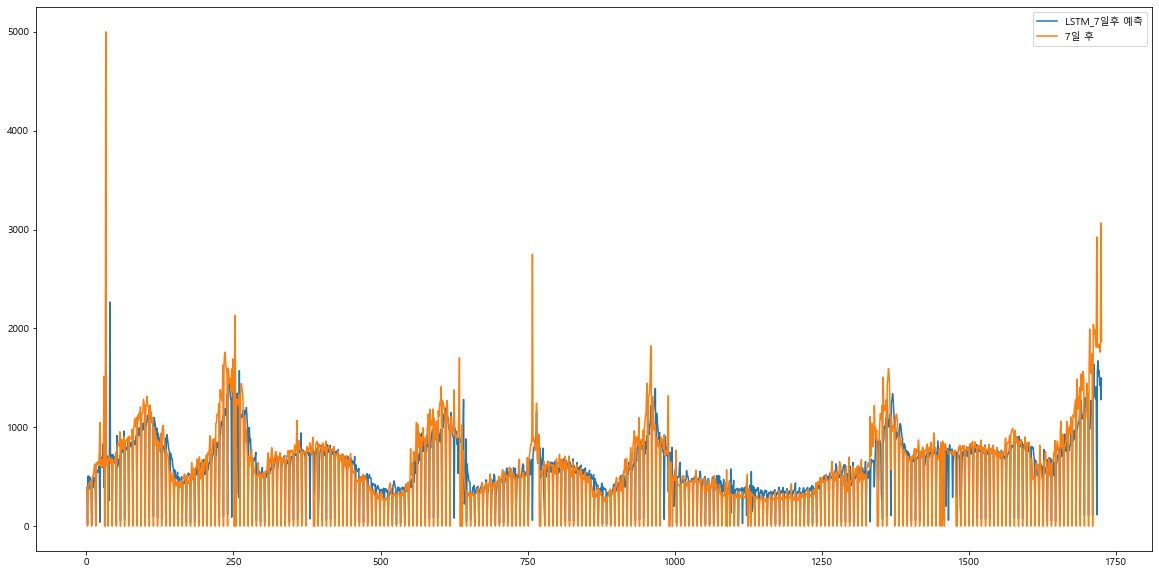

In [39]:
cabbage_train_df[['LSTM_7일후 예측','7일 후']].plot(figsize=(20,10));

## CNN 성능평가

In [40]:
cabbage_train_df['CNN_7일후 예측']= cnn_model.predict(cnn_x)

In [41]:
mean_absolute_error(cabbage_train_df['CNN_7일후 예측'],cabbage_train_df['7일 후'])

123.03654141108196

In [42]:
np.sqrt(mean_squared_error(cabbage_train_df['CNN_7일후 예측'],cabbage_train_df['7일 후']))

243.66274475858776

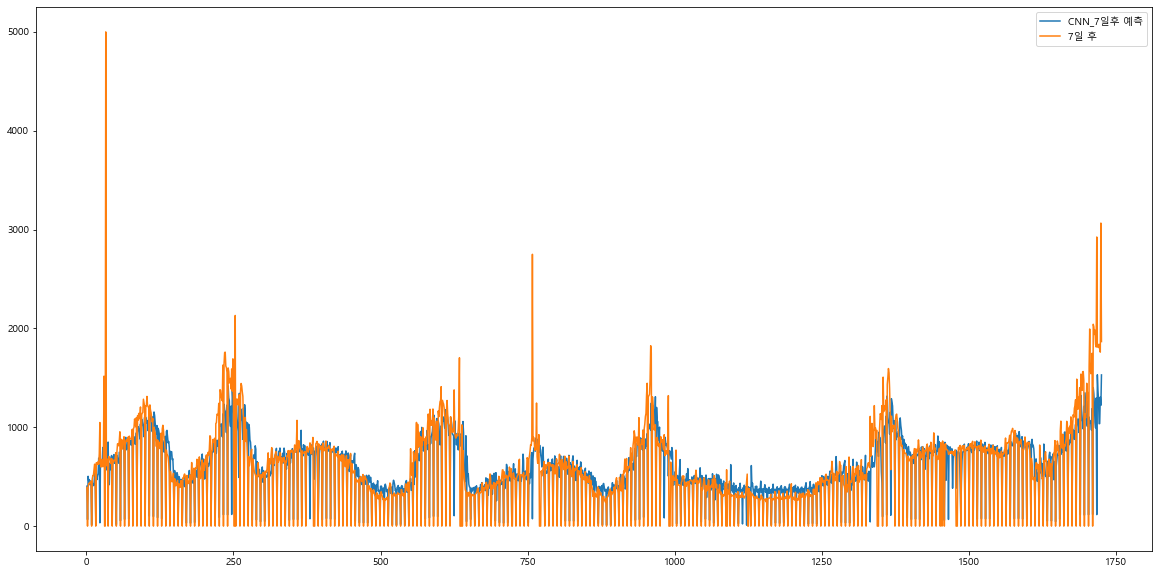

In [43]:
cabbage_train_df[['CNN_7일후 예측','7일 후']].plot(figsize=(20,10));